In [ ]:
# dataset
import numpy as np
import matplotlib.pyplot as plt
import random

In [3]:
def get_column(data, index):
    result = [row[index] for row in data]
    return result

In [2]:
def min_max_scaling(data1, data2, data3):
    max_data_1 = max(data1)
    max_data_2 = max(data2)
    max_data_3 = max(data3)

    min_data_1 = min(data1)
    min_data_2 = min(data2)
    min_data_3 = min(data3)

    
    # Implement your code to normalize data1, data2, data3 using min and max value
    
    return (data1, data2, data3), (max_data_1, max_data_2, max_data_3, min_data_1, min_data_2, min_data_3)

In [ ]:
def prepare_data(file_name_dataset):
  data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()

  # get tv (index=0)
  tv_data = get_column(data, 0)

  # get radio (index=1)
  radio_data = get_column(data, 1)

  # get newspaper (index=2)
  newspaper_data = get_column(data, 2)

  # get sales (index=3)
  sales_data = get_column(data, 3)

  # scale data (only for features)
  # remenber to scale input features in inference, therefore, we need to save max, min and mean values
  (tv_data, radio_data, newspaper_data), (max_data_1, max_data_2, max_data_3, min_data_1, min_data_2, min_data_3) = min_max_scaling(tv_data,radio_data,newspaper_data)

  # building X input  and y output for training
  #Create list of features for input
  X = [[1, x1, x2, x3] for x1, x2, x3 in zip(tv_data, radio_data, newspaper_data)]
  y = sales_data
  return X,y

In [ ]:

def predict(X_features, weights):
    return sum([f*w for f, w in zip(X_features, weights)])

def compute_loss(y_hat, y):
    return (y_hat - y)**2

# compute gradient
def compute_gradient_w(X_features, y, y_hat):
    dl_dweights = [2*xi*(y_hat-y) for xi in X_features] 
    return dl_dweights 

# update weights
def update_weight(weights, dl_dweights, lr):
    weights = [w - lr*dw for w, dw in zip(weights, dl_dweights)] 
    return weights    

In [ ]:
def initialize_params():
    bias = 0
    w1 = random.gauss(mu=0.0, sigma=0.01)
    w2 = random.gauss(mu=0.0, sigma=0.01)
    w3 = random.gauss(mu=0.0, sigma=0.01)
    
    return [0, 0.016992259082509283, 0.0070783670518262355, -0.002307860847821344]
    # return [bias, w1, w2, w3] 

In [ ]:
def implement_linear_regression(X_feature, y_ouput, epoch_max=50, lr=0.01):

  losses = []
  weights = initialize_params()
  N = len(y_ouput)
  for epoch in range(epoch_max):
      print("epoch", epoch)
      for i in range(N):
          # get a sample - row i     
          features_i = X_feature[i]
          y = y_ouput[i]
          
          # compute output 
          y_hat = predict(features_i, weights)

          # compute loss
          loss = compute_loss(y, y_hat)

          # compute gradient w1, w2, w3, b
          dl_dweights = compute_gradient_w(features_i, y, y_hat)

          # update parameters
          weights = update_weight(weights, dl_dweights, lr)

          # logging
          losses.append(loss) 
  return weights, losses

In [ ]:
X,y = prepare_data('advertising.csv')
W,L = implement_linear_regression(X,y)
plt.plot(L[0:100])
plt.xlabel("#iteration")
plt.ylabel("Loss")
plt.show()

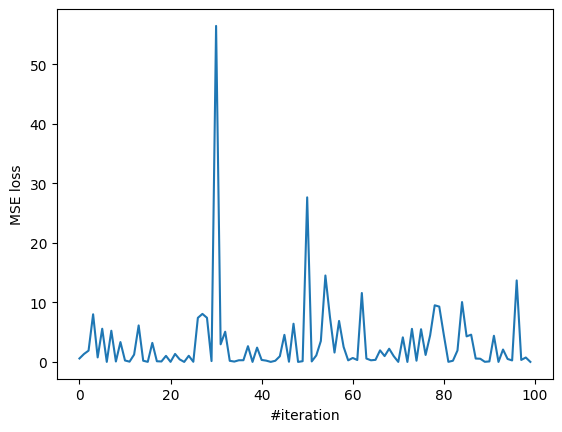

In [ ]:
X,y = prepare_data('advertising.csv')
W,L = implement_linear_regression(X,y)
plt.plot(L[-100:])
plt.xlabel("#iteration")
plt.ylabel("MSE loss")
plt.show()

In [ ]:
X,y = prepare_data('advertising.csv')
W,L = implement_linear_regression(X,y)
# Print loss value at interation 9999
print(L[9999])